# Example Usage of CML Data Generator

This notebook demonstrates how to generate fake CML data for specific timestamps using the `CMLDataGenerator` class.

## Setup

Import required libraries and set path to NetCDF file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_generator import CMLDataGenerator

# Path to NetCDF file
NETCDF_FILE = "../parser/example_data/openMRG_cmls_20150827_12hours.nc"

## Example 1: Using a List of Timestamps

Generate fake data for a list of specific timestamps.

In [2]:
print("Example 1: Using a list of timestamps")
print("-" * 50)

generator = CMLDataGenerator(
    netcdf_file=NETCDF_FILE,
    loop_duration_seconds=3600,  # 1 hour loop
)

# Define specific timestamps
timestamps = [
    pd.Timestamp("2026-01-21 10:00:00"),
    pd.Timestamp("2026-01-21 10:15:00"),
    pd.Timestamp("2026-01-21 10:30:00"),
]

# Generate fake data
df = generator.generate_data(timestamps)

print(f"Generated {len(df)} rows for {len(timestamps)} timestamps")
print(f"Unique CMls: {df['cml_id'].nunique()}")
print("\nFirst few rows:")
print(df.head(10))

generator.close()

Example 1: Using a list of timestamps
--------------------------------------------------
Generated 2184 rows for 3 timestamps
Unique CMls: 364

First few rows:
                 time  cml_id sublink_id  tsl   rsl
0 2026-01-21 10:00:00   10001  sublink_1  1.0 -48.2
1 2026-01-21 10:00:00   10002  sublink_1  0.0 -42.6
2 2026-01-21 10:00:00   10003  sublink_1 -5.0 -41.0
3 2026-01-21 10:00:00   10004  sublink_1 -1.0 -50.7
4 2026-01-21 10:00:00   10005  sublink_1  4.0 -47.6
5 2026-01-21 10:00:00   10006  sublink_1  3.0 -47.9
6 2026-01-21 10:00:00   10007  sublink_1 -4.0 -49.5
7 2026-01-21 10:00:00   10008  sublink_1  2.0 -42.6
8 2026-01-21 10:00:00   10009  sublink_1  5.0 -45.1
9 2026-01-21 10:00:00   10010  sublink_1  5.0 -49.5


## Example 2: Using Pandas Date Range

Generate fake data using `pd.date_range()` for regular intervals.

In [3]:
print("Example 2: Using pandas date_range")
print("-" * 50)

generator = CMLDataGenerator(
    netcdf_file=NETCDF_FILE,
    loop_duration_seconds=7200,  # 2 hour loop
)

# Create a date range (every 1 minutes for 4 hours)
timestamps = pd.date_range(start="2026-01-21 10:00:00", end="2026-01-21 14:00:00", freq="1min")

# Generate fake data
df = generator.generate_data(timestamps)

print(f"Generated {len(df)} rows for {len(timestamps)} timestamps")
print(f"Time range: {df['time'].min()} to {df['time'].max()}")
print("\nData for one CML:")
cml_data = df[df["cml_id"] == df["cml_id"].iloc[0]]
print(cml_data[["time", "cml_id", "tsl", "rsl"]])

generator.close()

Example 2: Using pandas date_range
--------------------------------------------------
Generated 175448 rows for 241 timestamps
Time range: 2026-01-21 10:00:00 to 2026-01-21 14:00:00

Data for one CML:
                      time  cml_id  tsl   rsl
0      2026-01-21 10:00:00   10001  1.0 -48.5
364    2026-01-21 10:00:00   10001  1.0 -45.7
728    2026-01-21 10:01:00   10001  1.0 -51.1
1092   2026-01-21 10:01:00   10001  1.0 -47.6
1456   2026-01-21 10:02:00   10001  1.0 -48.5
...                    ...     ...  ...   ...
173628 2026-01-21 13:58:00   10001  1.0 -46.4
173992 2026-01-21 13:59:00   10001  1.0 -48.5
174356 2026-01-21 13:59:00   10001  1.0 -45.4
174720 2026-01-21 14:00:00   10001  1.0 -48.5
175084 2026-01-21 14:00:00   10001  1.0 -45.7

[482 rows x 4 columns]


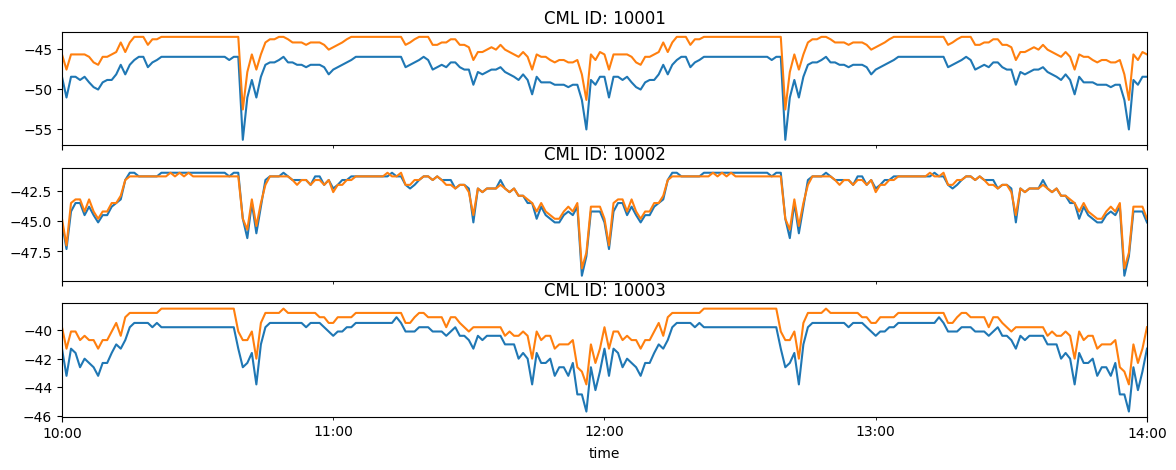

In [4]:
df.index = df.time

fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
for i in range(3):
    cmld_id = df.cml_id.unique()[i]
    df.loc[(df['cml_id'] == cmld_id) & (df['sublink_id'] == 'sublink_1')].rsl.plot(figsize=(14, 5), ax=axs[i], title=f"CML ID: {cmld_id}")
    df.loc[(df['cml_id'] == cmld_id) & (df['sublink_id'] == 'sublink_2')].rsl.plot(figsize=(14, 5), ax=axs[i], title=f"CML ID: {cmld_id}")

## Example 3: Current Time (No Timestamps Specified)

Generate fake data for the current time when no timestamps are provided.

In [5]:
print("Example 3: Current time (no timestamps specified)")
print("-" * 50)

generator = CMLDataGenerator(
    netcdf_file=NETCDF_FILE,
    loop_duration_seconds=3600,
)

# Generate data for current time (default behavior)
df = generator.generate_data()

print(f"Generated {len(df)} rows for current timestamp")
print(f"Timestamp: {df['time'].iloc[0]}")
print(f"CMls: {df['cml_id'].nunique()}")

generator.close()

Example 3: Current time (no timestamps specified)
--------------------------------------------------
Generated 728 rows for current timestamp
Timestamp: 2026-01-21 14:21:01.007763
CMls: 364


## Example 4: Export to CSV

Generate fake data for one day at 5-minute intervals and export to CSV.

In [6]:
print("Example 4: Export to CSV")
print("-" * 50)

generator = CMLDataGenerator(
    netcdf_file=NETCDF_FILE,
    loop_duration_seconds=3600,
    output_dir="example_output",
)

# Generate data for one day at 5-minute intervals
timestamps = pd.date_range(
    start="2026-01-21 00:00:00", end="2026-01-22 00:00:00", freq="5min"
)

df = generator.generate_data(timestamps)

# Export to CSV
output_file = "example_output/cml_data_custom_timestamps.csv"
df.to_csv(output_file, index=False)

print(f"Generated {len(df)} rows")
print(f"Exported to: {output_file}")
print(f"File size: {len(df) * len(df.columns)} data points")

generator.close()

Example 4: Export to CSV
--------------------------------------------------
Generated 210392 rows
Exported to: example_output/cml_data_custom_timestamps.csv
File size: 1051960 data points
